In [151]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy import integrate
from skimage import io

# Load the image with PIL and convert to grayscale
img = Image.open('Alu_saft_27.tif').convert('L')
image = np.array(img)
print(image.shape)
print(image.dtype)

(240, 1700)
uint8


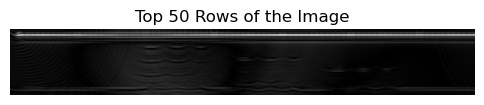

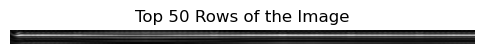

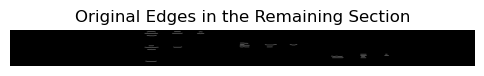

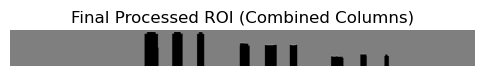

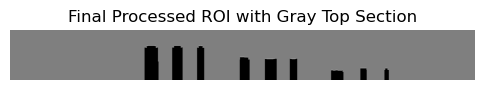

In [153]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# -----------------------------
# 1. Create an example image and split into top and ROI sections


# Extract the top 50 rows (we'll show this later)
top_section = image[:52, :]

# The remaining section is used as the region of interest (ROI)
remaining_section = image[52:185, :]

# -----------------------------
# 2. Preprocessing: blur the ROI to reduce noise, then apply Canny edge detection
blurred_roi = cv2.GaussianBlur(remaining_section, (5, 5), 0)
edges_roi = cv2.Canny(blurred_roi, 60, 55)

# -----------------------------
# 3. Split the edge-detected ROI into 100 vertical segments
n_columns = 100
columns = np.array_split(edges_roi, n_columns, axis=1)

# -----------------------------
# 4. Process each column segment:
# For each pixel column in the segment, traverse from the top downward,
# - Fill with gray (127) until the first nonzero (edge) pixel is encountered
# - Set all pixels below the first edge to 0
final_columns = []  # To store the processed segments

for seg in columns:
    # Make a copy so that we do not modify the original segment
    processed_seg = seg.copy()
    # Process each pixel column within this segment
    for j in range(processed_seg.shape[1]):
        edge_found = False
        # Iterate over the rows from top to bottom
        for i in range(processed_seg.shape[0]):
            if processed_seg[i, j] != 0:  # Found the first edge in this pixel column
                processed_seg[i+1:, j] = 0  # Remove all pixels below (set to 0)
                edge_found = True
                break  # Move to the next pixel column
            else:
                # If no edge has been found yet, set pixel to gray (127)
                processed_seg[i, j] = 127
        # If no edge was found in the entire column, set all pixels to gray (127)
        if not edge_found:
            processed_seg[:, j] = 127
    final_columns.append(processed_seg)

# Combine the processed segments back horizontally for a final processed ROI image
final_result = np.hstack(final_columns)

gray_top = np.full((50, final_result.shape[1]), 127, dtype=np.uint8)  # 50 rows of gray pixels
final_result_with_top = np.vstack([gray_top, final_result])  # Stack gray top section on top
# -----------------------------
# 5. Visualization
# Display the top section (unchanged)
plt.figure(figsize=(6, 3))
plt.imshow(image, cmap='gray')
plt.title("Top 50 Rows of the Image")
plt.axis('off')
plt.show()

# Display the top section (unchanged)
plt.figure(figsize=(6, 3))
plt.imshow(top_section, cmap='gray')
plt.title("Top 50 Rows of the Image")
plt.axis('off')
plt.show()

# Display the original edge-detected ROI
plt.figure(figsize=(6, 4))
plt.imshow(edges_roi, cmap='gray')
plt.title("Original Edges in the Remaining Section")
plt.axis('off')
plt.show()

# Option B: Display the final combined processed ROI
plt.figure(figsize=(6, 4))
plt.imshow(final_result, cmap='gray')
plt.title("Final Processed ROI (Combined Columns)")
plt.axis('off')
plt.show()




# Display the final combined processed ROI with the added gray top
plt.figure(figsize=(6, 4))
plt.imshow(final_result_with_top, cmap='gray')
plt.title("Final Processed ROI with Gray Top Section")
plt.axis('off')
plt.show()

In [155]:
cv2.imwrite("/Users/abtinsalehi/Desktop/SAFT/SAFT V2/SAFT_V2_27.tif", final_result_with_top)


True